In [46]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

image = np.random.uniform(0,10,10000)
for i,v in enumerate(image):
    roll = np.random.uniform(0,1)
    if (roll > 0.5):
        image[i] = 0
    
image = np.reshape(image, (100,100))
print image

[[ 2.03540919  1.35948701  0.         ...,  0.          0.          0.        ]
 [ 7.14833807  6.83760486  8.13079306 ...,  0.          0.          9.89018935]
 [ 7.15323512  5.98169735  0.         ...,  9.19085461  0.          0.        ]
 ..., 
 [ 8.14445057  1.27480634  0.11130535 ...,  0.          7.81537515
   4.77285361]
 [ 0.          8.79365264  0.         ...,  0.2187694   0.37254007  0.        ]
 [ 5.80815157  0.          5.42711674 ...,  5.37172685  0.          0.        ]]


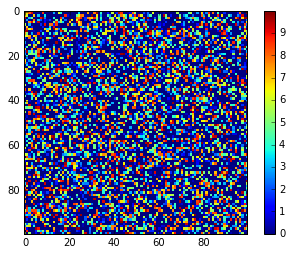

In [47]:
def show_image(image):
    plt.imshow(image, interpolation='nearest')
    plt.colorbar()
    plt.show()
    
show_image(image)

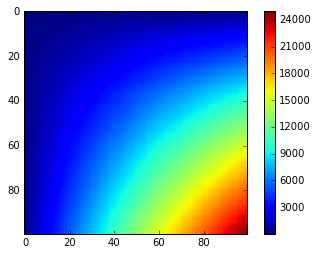

In [48]:
def compute_integral_image(image):
    int_image = image * 0.0;
    for i, rowval in enumerate(image):
        for j, val in enumerate(rowval):
            ## top left case
            if (i==0 and j==0):
                int_image[i,j] = image[i,j]
                continue
            ## top case
            if (i==0):
                int_image[i,j] = image[i,j] + int_image[i,j-1]
                continue
                
            ## left case
            if (j==0):
                int_image[i,j] = image[i,j] + int_image[i-1,j]
                continue
            
            ## normal
            int_image[i,j] = image[i,j] - int_image[i-1,j-1] + int_image[i,j-1] + int_image[i-1,j]
    
    return int_image
            
int_image = compute_integral_image(image)
show_image(int_image)

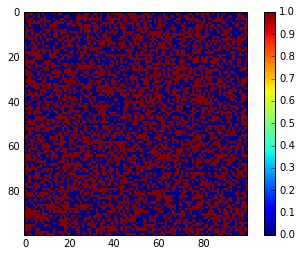

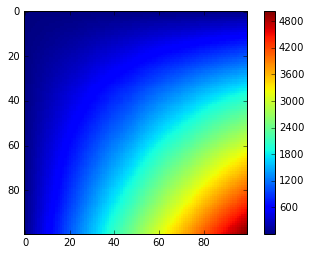

In [53]:
def compute_nonzero_image(image):
    nonzero_image = image * 0.0;
    for i, rowval in enumerate(image):
        for j, val in enumerate(rowval):
            if (val != 0):
                nonzero_image[i,j] = 1
            else:
                nonzero_image[i,j] = 0
    return nonzero_image

nonzero_image = compute_nonzero_image(image)
nonzero_integral_image = compute_integral_image(nonzero_image)
show_image(nonzero_image)
show_image(nonzero_integral_image)

In [54]:
def compute_average_over_box(int_image, nonzero_integral_image, xy_top_left, xy_bottom_right):
    xy_top_right   = [xy_top_left[0], xy_bottom_right[1]]
    xy_bottom_left = [xy_bottom_right[0], xy_top_left[1]]
    
    I_D       = int_image[xy_bottom_right[0], xy_bottom_right[1]]
    I_A       = int_image[xy_top_left[0], xy_top_left[1]]
    I_B       = int_image[xy_top_right[0], xy_top_right[1]]
    I_C       = int_image[xy_bottom_left[0], xy_bottom_left[1]]
    
    nonzero_D = nonzero_image[xy_bottom_right[0], xy_bottom_right[1]]
    nonzero_A = nonzero_image[xy_top_left[0], xy_top_left[1]]
    nonzero_B = nonzero_image[xy_top_right[0], xy_top_right[1]]
    nonzero_C = nonzero_image[xy_bottom_left[0], xy_bottom_left[1]]
      
    nonzero_count = nonzero_D + nonzero_A - nonzero_B - nonzero_C
    if (nonzero_count == 0):
        return 0
    
    integral_sum =  I_D + I_A - I_B - I_C
    print integral_sum
    print nonzero_count
    return integral_sum / nonzero_count
    

print compute_average_over_box(int_image, nonzero_integral_image, [1,1], [20,20])

866.712928745
1.0
866.712928745
